# Install necessary libraries

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.8/882.8 kB 39.4 MB/s eta 0:00:00


In [3]:
!pip install dill

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.2 MB/s eta 0:00:00


In [4]:
import dill
print(dill.__version__)


0.3.9


# Load the dataset

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="48h0Hw7gpVVhWDUVSTSK")
project = rf.workspace("cameldetection").project("accident_detection-kpitz")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Accident_Detection-1 in yolov11:: 100%|██████████| 1942/1942 [00:00<00:00, 5550.72it/s]


# Create data.yaml

In [6]:
import yaml


data = {
    'train': '/content/Accident_Detection-1/train',
    'val': '/content/Accident_Detection-1/valid',
    'nc': 2,  # two classes

    'names': ['Accident', 'Non-Accident']
}


with open('data.yaml', 'w') as file:
    yaml.dump(data, file)



# Train the model

In [8]:
from ultralytics import YOLO


finetune_model= YOLO("yolo11m.pt")


finetune_model.train(
    data="data.yaml",
    epochs=50,
    batch=16,
    imgsz=640,
    lr0=0.001,
    augment=True,
    optimizer="Adam",

)


Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None

100%|██████████| 755k/755k [00:00<00:00, 98.1MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

train: Scanning /content/Accident_Detection-1/train/labels... 676 images, 341 backgrounds, 0 corrupt: 100%|██████████| 676/676 [00:00<00:00, 922.73it/s]

train: New cache created: /content/Accident_Detection-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Accident_Detection-1/valid/labels... 193 images, 87 backgrounds, 0 corrupt: 100%|██████████| 193/193 [00:00<00:00, 830.37it/s]

val: New cache created: /content/Accident_Detection-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G     0.5308      1.625      1.177          8        640: 100%|██████████| 43/43 [18:54<00:00, 26.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:37<00:00, 13.88s/it]

                   all        193        108      0.677      0.291      0.164     0.0929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G     0.5928       1.36      1.201          4        640: 100%|██████████| 43/43 [18:19<00:00, 25.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:30<00:00, 12.87s/it]

                   all        193        108    0.00683     0.0857    0.00392     0.0016



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G     0.6939      1.602      1.259          1        640: 100%|██████████| 43/43 [18:13<00:00, 25.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:32<00:00, 13.15s/it]

                   all        193        108     0.0219     0.0602    0.00944    0.00232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G     0.6706      1.375      1.245          5        640: 100%|██████████| 43/43 [18:04<00:00, 25.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:32<00:00, 13.24s/it]

                   all        193        108      0.112      0.244     0.0711     0.0201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G     0.6523      1.348      1.259          7        640: 100%|██████████| 43/43 [18:04<00:00, 25.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:29<00:00, 12.83s/it]

                   all        193        108      0.322      0.345      0.249      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G     0.6394      1.409      1.253          5        640: 100%|██████████| 43/43 [18:03<00:00, 25.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:29<00:00, 12.83s/it]

                   all        193        108      0.149      0.362      0.216      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G     0.5413      1.249      1.158          8        640: 100%|██████████| 43/43 [18:26<00:00, 25.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:36<00:00, 13.79s/it]

                   all        193        108      0.312      0.336      0.301      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.5503      1.227      1.168          8        640: 100%|██████████| 43/43 [18:24<00:00, 25.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:32<00:00, 13.27s/it]

                   all        193        108      0.395      0.538      0.468      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.5045      1.124      1.142          8        640: 100%|██████████| 43/43 [18:16<00:00, 25.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:30<00:00, 12.98s/it]

                   all        193        108      0.893      0.342       0.41       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G     0.4622      1.117      1.091          5        640: 100%|██████████| 43/43 [18:18<00:00, 25.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:30<00:00, 12.90s/it]

                   all        193        108       0.43      0.648       0.55      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.4451      1.126      1.074          6        640: 100%|██████████| 43/43 [17:59<00:00, 25.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:30<00:00, 12.89s/it]

                   all        193        108      0.432      0.542      0.438      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.4546      1.073      1.102          6        640: 100%|██████████| 43/43 [17:52<00:00, 24.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:30<00:00, 12.99s/it]

                   all        193        108      0.626      0.502      0.544      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.4334     0.9937      1.094          7        640: 100%|██████████| 43/43 [17:46<00:00, 24.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:29<00:00, 12.85s/it]

                   all        193        108      0.794      0.372      0.356      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.4059     0.9368      1.052          3        640: 100%|██████████| 43/43 [18:06<00:00, 25.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:29<00:00, 12.75s/it]

                   all        193        108       0.41      0.488      0.433      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.3981     0.9773      1.043          5        640: 100%|██████████| 43/43 [18:29<00:00, 25.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:33<00:00, 13.36s/it]

                   all        193        108      0.526      0.501      0.499      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.3772     0.9179      1.032          4        640: 100%|██████████| 43/43 [18:29<00:00, 25.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:33<00:00, 13.37s/it]

                   all        193        108      0.623      0.599      0.554      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.3771     0.9335      1.046          3        640: 100%|██████████| 43/43 [18:30<00:00, 25.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:33<00:00, 13.29s/it]

                   all        193        108      0.925      0.362       0.43      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.3767      0.951       1.06          6        640: 100%|██████████| 43/43 [18:31<00:00, 25.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:31<00:00, 13.05s/it]

                   all        193        108       0.43      0.572      0.502      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.3368     0.8152      1.012          3        640: 100%|██████████| 43/43 [18:30<00:00, 25.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:33<00:00, 13.35s/it]

                   all        193        108      0.518      0.415      0.453      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.3596     0.9321      1.021          1        640: 100%|██████████| 43/43 [18:24<00:00, 25.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:33<00:00, 13.31s/it]

                   all        193        108      0.522      0.668      0.564      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.3489     0.9008      1.022          6        640: 100%|██████████| 43/43 [18:31<00:00, 25.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:33<00:00, 13.34s/it]

                   all        193        108      0.834      0.546      0.652       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G       0.34     0.8414      1.022          3        640: 100%|██████████| 43/43 [18:31<00:00, 25.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:33<00:00, 13.37s/it]

                   all        193        108      0.769      0.637      0.651      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.3281       0.82      1.018          6        640: 100%|██████████| 43/43 [18:28<00:00, 25.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:33<00:00, 13.36s/it]

                   all        193        108      0.569      0.624      0.619      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.3102     0.7939     0.9867          4        640: 100%|██████████| 43/43 [18:39<00:00, 26.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:33<00:00, 13.34s/it]

                   all        193        108      0.677      0.577      0.604      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.2879     0.7678     0.9781          7        640: 100%|██████████| 43/43 [18:23<00:00, 25.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:33<00:00, 13.41s/it]

                   all        193        108      0.562      0.773      0.615      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.2957     0.8026     0.9899          6        640: 100%|██████████| 43/43 [18:28<00:00, 25.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:32<00:00, 13.26s/it]

                   all        193        108       0.67       0.75      0.707      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.2738     0.7016     0.9807          4        640: 100%|██████████| 43/43 [18:37<00:00, 25.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:31<00:00, 13.07s/it]

                   all        193        108      0.704      0.729      0.685       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.2783     0.7276     0.9837          3        640: 100%|██████████| 43/43 [17:59<00:00, 25.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:30<00:00, 12.92s/it]

                   all        193        108      0.585      0.589      0.615      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.2846     0.7158     0.9725          8        640: 100%|██████████| 43/43 [18:09<00:00, 25.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:32<00:00, 13.22s/it]

                   all        193        108      0.765      0.688      0.689      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.2819     0.7519     0.9791          6        640: 100%|██████████| 43/43 [18:13<00:00, 25.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:30<00:00, 12.92s/it]

                   all        193        108      0.532      0.809      0.663      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      0.257     0.6784     0.9611          4        640: 100%|██████████| 43/43 [17:56<00:00, 25.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:31<00:00, 13.04s/it]

                   all        193        108      0.753        0.7      0.756      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.2586     0.7236     0.9601          8        640: 100%|██████████| 43/43 [18:00<00:00, 25.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:29<00:00, 12.85s/it]

                   all        193        108      0.713      0.748      0.802       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.2475     0.6644     0.9522          4        640: 100%|██████████| 43/43 [17:58<00:00, 25.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:30<00:00, 12.95s/it]

                   all        193        108      0.763      0.728      0.742      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      0.241     0.6717     0.9554          4        640: 100%|██████████| 43/43 [17:50<00:00, 24.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:30<00:00, 12.91s/it]

                   all        193        108      0.675      0.692      0.664      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      0.252     0.7027     0.9625          6        640: 100%|██████████| 43/43 [18:30<00:00, 25.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:31<00:00, 13.08s/it]

                   all        193        108      0.877      0.718      0.807      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.2261     0.6281      0.945          4        640: 100%|██████████| 43/43 [18:23<00:00, 25.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:33<00:00, 13.34s/it]

                   all        193        108      0.669      0.844      0.721      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G      0.241     0.6444      0.961          6        640: 100%|██████████| 43/43 [18:21<00:00, 25.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:32<00:00, 13.26s/it]

                   all        193        108      0.688      0.749      0.717      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.2181     0.6141     0.9435          5        640: 100%|██████████| 43/43 [18:06<00:00, 25.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:29<00:00, 12.85s/it]

                   all        193        108      0.782      0.725       0.75      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.2163     0.5586      0.939          6        640: 100%|██████████| 43/43 [18:04<00:00, 25.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:28<00:00, 12.66s/it]

                   all        193        108      0.716      0.767      0.671      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.2058     0.5769     0.9418          6        640: 100%|██████████| 43/43 [18:02<00:00, 25.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:30<00:00, 12.89s/it]

                   all        193        108      0.776      0.754      0.722      0.692


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      0.211     0.5932     0.9645          2        640: 100%|██████████| 43/43 [17:49<00:00, 24.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:31<00:00, 13.12s/it]

                   all        193        108      0.784      0.768      0.765      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.1864     0.4886     0.9652          3        640: 100%|██████████| 43/43 [18:08<00:00, 25.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:30<00:00, 12.93s/it]

                   all        193        108      0.707      0.795      0.737      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.1822      0.459      0.929          3        640: 100%|██████████| 43/43 [17:52<00:00, 24.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:28<00:00, 12.69s/it]

                   all        193        108      0.776      0.738       0.74      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.1642     0.4387     0.9085          2        640: 100%|██████████| 43/43 [18:01<00:00, 25.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:30<00:00, 12.92s/it]

                   all        193        108      0.763      0.754      0.724      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.1604     0.4153       0.92          3        640: 100%|██████████| 43/43 [18:09<00:00, 25.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:31<00:00, 13.00s/it]

                   all        193        108      0.739      0.794      0.785      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.1644      0.453     0.9254          1        640: 100%|██████████| 43/43 [17:52<00:00, 24.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:30<00:00, 12.94s/it]

                   all        193        108      0.721      0.829      0.802      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.1594      0.394     0.9264          2        640: 100%|██████████| 43/43 [18:05<00:00, 25.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:33<00:00, 13.41s/it]

                   all        193        108      0.729      0.814       0.81      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.1305     0.3667     0.9231          4        640: 100%|██████████| 43/43 [18:06<00:00, 25.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:30<00:00, 13.00s/it]

                   all        193        108      0.746      0.887      0.801      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.1364     0.3686     0.9013          3        640: 100%|██████████| 43/43 [17:43<00:00, 24.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:30<00:00, 12.90s/it]

                   all        193        108      0.722      0.839      0.808      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.1283     0.3361     0.9056          1        640: 100%|██████████| 43/43 [18:10<00:00, 25.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:31<00:00, 13.01s/it]

                   all        193        108       0.72      0.873      0.832      0.815



50 epochs completed in 16.479 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 40.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11m summary (fused): 303 layers, 20,031,574 parameters, 0 gradients, 67.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [03:10<00:00, 27.16s/it]


                   all        193        108      0.797      0.798      0.834      0.824
              Accident         97         98      0.988      0.796      0.964      0.954
          Non-Accident         10         10      0.606        0.8      0.705      0.695
Speed: 0.6ms preprocess, 976.3ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7972bc698910>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")
model.train(data="data.yaml", epochs=50)

Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=No

train: Scanning /content/Accident_Detection-1/train/labels... 676 images, 341 backgrounds, 0 corrupt: 100%|██████████| 676/676 [00:00<00:00, 1143.31it/s]


train: New cache created: /content/Accident_Detection-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Accident_Detection-1/valid/labels... 193 images, 87 backgrounds, 0 corrupt: 100%|██████████| 193/193 [00:00<00:00, 1157.87it/s]

val: New cache created: /content/Accident_Detection-1/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G     0.4676      2.828      1.118          8        640: 100%|██████████| 43/43 [02:41<00:00,  3.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:21<00:00,  3.14s/it]


                   all        193        108    0.00689      0.995      0.325       0.18

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G     0.4879      2.001      1.112          4        640: 100%|██████████| 43/43 [02:40<00:00,  3.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:21<00:00,  3.07s/it]

                   all        193        108      0.658      0.158      0.157     0.0959



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G     0.5899      2.132      1.164          1        640: 100%|██████████| 43/43 [02:42<00:00,  3.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:18<00:00,  2.71s/it]

                   all        193        108      0.129      0.107     0.0745      0.018



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G     0.5951      1.799      1.175          5        640: 100%|██████████| 43/43 [02:38<00:00,  3.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:17<00:00,  2.54s/it]

                   all        193        108     0.0152      0.111    0.00859    0.00172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G     0.5472      1.622      1.147          7        640: 100%|██████████| 43/43 [02:41<00:00,  3.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.42s/it]

                   all        193        108      0.198      0.214      0.142     0.0496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G     0.5412       1.48      1.146          5        640: 100%|██████████| 43/43 [02:39<00:00,  3.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.24s/it]

                   all        193        108      0.221      0.255      0.216       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G     0.5259      1.394      1.134          8        640: 100%|██████████| 43/43 [02:35<00:00,  3.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.20s/it]

                   all        193        108      0.671      0.346      0.223      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.4989      1.325      1.117          8        640: 100%|██████████| 43/43 [02:40<00:00,  3.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.28s/it]

                   all        193        108      0.571      0.395      0.447      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.4721      1.237      1.107          8        640: 100%|██████████| 43/43 [02:36<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.22s/it]

                   all        193        108      0.342      0.357      0.332      0.271



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G     0.4463       1.15      1.072          5        640: 100%|██████████| 43/43 [02:38<00:00,  3.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.20s/it]

                   all        193        108      0.471       0.61       0.51      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.4367      1.111       1.07          6        640: 100%|██████████| 43/43 [02:37<00:00,  3.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.35s/it]

                   all        193        108      0.604      0.587      0.566      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.4095      1.051      1.049          6        640: 100%|██████████| 43/43 [02:36<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.21s/it]

                   all        193        108      0.438       0.63      0.437      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.3897      1.016       1.05          7        640: 100%|██████████| 43/43 [02:36<00:00,  3.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.17s/it]

                   all        193        108       0.53      0.713      0.628      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.3585     0.9605      1.012          3        640: 100%|██████████| 43/43 [02:37<00:00,  3.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.19s/it]

                   all        193        108      0.634      0.618      0.613      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.3363     0.9489     0.9989          5        640: 100%|██████████| 43/43 [02:37<00:00,  3.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.10s/it]

                   all        193        108      0.635      0.632      0.593      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.3455     0.9155      1.009          4        640: 100%|██████████| 43/43 [02:37<00:00,  3.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.32s/it]

                   all        193        108      0.557      0.683      0.608      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      0.361     0.9182      1.023          3        640: 100%|██████████| 43/43 [02:34<00:00,  3.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.21s/it]

                   all        193        108      0.831      0.625      0.725      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G     0.3265     0.9039      1.007          6        640: 100%|██████████| 43/43 [02:42<00:00,  3.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.34s/it]

                   all        193        108      0.651      0.647      0.686      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.2971     0.8137     0.9863          3        640: 100%|██████████| 43/43 [02:36<00:00,  3.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.34s/it]

                   all        193        108      0.607      0.633      0.558      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      0.293     0.8464      0.982          1        640: 100%|██████████| 43/43 [02:36<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.18s/it]

                   all        193        108      0.728      0.494      0.612      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      0.306     0.8203     0.9915          6        640: 100%|██████████| 43/43 [02:36<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.99s/it]

                   all        193        108      0.665      0.789      0.735      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.2782     0.7739     0.9702          3        640: 100%|██████████| 43/43 [02:38<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.39s/it]

                   all        193        108       0.69      0.572      0.663      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.2842     0.7783     0.9761          6        640: 100%|██████████| 43/43 [02:36<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.30s/it]

                   all        193        108      0.847      0.567      0.717      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      0.284     0.7512     0.9657          4        640: 100%|██████████| 43/43 [02:36<00:00,  3.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.22s/it]

                   all        193        108      0.625      0.694      0.683      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.2669     0.7256      0.961          7        640: 100%|██████████| 43/43 [02:40<00:00,  3.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.18s/it]

                   all        193        108      0.741      0.744      0.777      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.2773      0.738     0.9653          6        640: 100%|██████████| 43/43 [02:36<00:00,  3.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.17s/it]

                   all        193        108      0.715      0.782       0.77       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.2395     0.6636     0.9576          4        640: 100%|██████████| 43/43 [02:34<00:00,  3.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.30s/it]

                   all        193        108      0.889      0.738      0.763      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.2399     0.6594     0.9504          3        640: 100%|██████████| 43/43 [02:35<00:00,  3.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.19s/it]

                   all        193        108       0.74      0.737      0.765      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.2566     0.7104     0.9679          8        640: 100%|██████████| 43/43 [02:36<00:00,  3.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.35s/it]

                   all        193        108      0.641      0.807      0.737      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.2552     0.6731     0.9618          6        640: 100%|██████████| 43/43 [02:38<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.39s/it]

                   all        193        108      0.737      0.735      0.696      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      0.224     0.6288     0.9357          4        640: 100%|██████████| 43/43 [02:35<00:00,  3.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.41s/it]

                   all        193        108      0.779      0.705      0.763      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G     0.2362     0.6911     0.9516          8        640: 100%|██████████| 43/43 [02:35<00:00,  3.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.19s/it]

                   all        193        108      0.708      0.735      0.721      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.2253     0.5978     0.9394          4        640: 100%|██████████| 43/43 [02:38<00:00,  3.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.26s/it]

                   all        193        108      0.654      0.784      0.784      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.2164     0.6461     0.9371          4        640: 100%|██████████| 43/43 [02:40<00:00,  3.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.21s/it]

                   all        193        108      0.573      0.804      0.681      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.2318     0.6654     0.9458          6        640: 100%|██████████| 43/43 [02:39<00:00,  3.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.37s/it]

                   all        193        108        0.7      0.798      0.772      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.1999     0.5978     0.9292          4        640: 100%|██████████| 43/43 [02:38<00:00,  3.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.42s/it]

                   all        193        108      0.797      0.723      0.792      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.2072     0.5981     0.9394          6        640: 100%|██████████| 43/43 [02:37<00:00,  3.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.38s/it]

                   all        193        108      0.759      0.739      0.742      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.2035     0.5648     0.9322          5        640: 100%|██████████| 43/43 [02:39<00:00,  3.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.29s/it]

                   all        193        108      0.618      0.794      0.693      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.1932     0.5215     0.9224          6        640: 100%|██████████| 43/43 [02:38<00:00,  3.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.37s/it]

                   all        193        108      0.717      0.787       0.77      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.2004     0.5448     0.9336          6        640: 100%|██████████| 43/43 [02:37<00:00,  3.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.38s/it]

                   all        193        108      0.778      0.838      0.807      0.761


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.1918     0.6323      0.951          2        640: 100%|██████████| 43/43 [02:33<00:00,  3.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.16s/it]

                   all        193        108      0.648      0.799      0.744      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.1705     0.4617     0.9406          3        640: 100%|██████████| 43/43 [02:32<00:00,  3.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.34s/it]

                   all        193        108      0.719      0.854      0.793      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.1534     0.4534     0.9056          3        640: 100%|██████████| 43/43 [02:33<00:00,  3.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.22s/it]

                   all        193        108      0.661      0.864      0.754       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.1516     0.4007     0.8998          2        640: 100%|██████████| 43/43 [02:32<00:00,  3.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.01s/it]

                   all        193        108      0.675      0.913      0.812      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.1369     0.3775      0.904          3        640: 100%|██████████| 43/43 [02:32<00:00,  3.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.18s/it]

                   all        193        108      0.743      0.784      0.802      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.1559     0.4105      0.918          1        640: 100%|██████████| 43/43 [02:32<00:00,  3.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.01s/it]

                   all        193        108      0.764       0.89      0.836      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.1387     0.3777     0.9125          2        640: 100%|██████████| 43/43 [02:33<00:00,  3.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.20s/it]

                   all        193        108      0.759      0.894      0.838      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.1168     0.3536      0.909          4        640: 100%|██████████| 43/43 [02:34<00:00,  3.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.33s/it]

                   all        193        108      0.769      0.894      0.864      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.1204     0.3252     0.8889          3        640: 100%|██████████| 43/43 [02:32<00:00,  3.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.34s/it]

                   all        193        108      0.787       0.87      0.872      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.1107     0.3092     0.8893          1        640: 100%|██████████| 43/43 [02:32<00:00,  3.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.27s/it]

                   all        193        108      0.771        0.9      0.868      0.858



50 epochs completed in 2.418 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.11s/it]


                   all        193        108      0.787       0.87      0.872      0.862
              Accident         97         98      0.976       0.84      0.962      0.948
          Non-Accident         10         10      0.599        0.9      0.783      0.776
Speed: 0.7ms preprocess, 68.3ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7efe44101a20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# Train the best.pt from the model
to improve performance

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/best.pt")
model.train(data="data.yaml", epochs=50)

Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/best (4).pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

train: Scanning /content/Accident_Detection-1/train/labels.cache... 676 images, 341 backgrounds, 0 corrupt: 100%|██████████| 676/676 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Accident_Detection-1/valid/labels.cache... 193 images, 87 backgrounds, 0 corrupt: 100%|██████████| 193/193 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G     0.2071     0.6348     0.9316          8        640: 100%|██████████| 43/43 [02:40<00:00,  3.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.42s/it]

                   all        193        108      0.804      0.854      0.777      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      0.243     0.6114     0.9519          4        640: 100%|██████████| 43/43 [02:38<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.98s/it]

                   all        193        108      0.686      0.697      0.638      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G     0.2959      1.231     0.9675          1        640: 100%|██████████| 43/43 [02:34<00:00,  3.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.98s/it]

                   all        193        108      0.566      0.605      0.641      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G     0.3074     0.7897     0.9768          5        640: 100%|██████████| 43/43 [02:40<00:00,  3.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.98s/it]

                   all        193        108       0.64      0.688       0.62      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G     0.3196     0.7995     0.9919          7        640: 100%|██████████| 43/43 [02:35<00:00,  3.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.99s/it]

                   all        193        108      0.679      0.699      0.729      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G     0.3252     0.7855      1.015          5        640: 100%|██████████| 43/43 [02:41<00:00,  3.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.19s/it]

                   all        193        108      0.665      0.647      0.695       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G     0.3092      0.795      1.001          8        640: 100%|██████████| 43/43 [02:41<00:00,  3.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.17s/it]

                   all        193        108       0.67      0.628        0.7       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G     0.2896     0.7438      0.983          8        640: 100%|██████████| 43/43 [02:37<00:00,  3.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  2.00s/it]

                   all        193        108       0.69      0.788      0.695      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G     0.2801     0.7095     0.9737          8        640: 100%|██████████| 43/43 [02:37<00:00,  3.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.99s/it]

                   all        193        108      0.767      0.684      0.725      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G     0.2775     0.7086       0.97          5        640: 100%|██████████| 43/43 [02:35<00:00,  3.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.16s/it]

                   all        193        108      0.607      0.741      0.696      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G     0.2817     0.6631     0.9739          6        640: 100%|██████████| 43/43 [02:35<00:00,  3.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.16s/it]

                   all        193        108       0.67      0.666      0.738      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G     0.2712     0.6963     0.9671          6        640: 100%|██████████| 43/43 [02:38<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.99s/it]

                   all        193        108      0.598      0.808      0.745      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G     0.2728     0.6694     0.9834          7        640: 100%|██████████| 43/43 [02:34<00:00,  3.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.99s/it]

                   all        193        108      0.692      0.804      0.739      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G     0.2485     0.6354     0.9536          3        640: 100%|██████████| 43/43 [02:37<00:00,  3.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.98s/it]

                   all        193        108      0.696      0.648      0.722      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.2567     0.6473     0.9511          5        640: 100%|██████████| 43/43 [02:34<00:00,  3.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.15s/it]

                   all        193        108      0.782      0.671      0.727      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G     0.2385     0.6037     0.9403          4        640: 100%|██████████| 43/43 [02:38<00:00,  3.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.18s/it]

                   all        193        108      0.757      0.679      0.705      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G     0.2615     0.6369       0.95          3        640: 100%|██████████| 43/43 [02:37<00:00,  3.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.99s/it]

                   all        193        108      0.731      0.662      0.728      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      0.249     0.6332     0.9658          6        640: 100%|██████████| 43/43 [02:39<00:00,  3.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.19s/it]

                   all        193        108      0.782      0.781      0.802      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G     0.2292     0.6044     0.9456          3        640: 100%|██████████| 43/43 [02:34<00:00,  3.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.15s/it]

                   all        193        108      0.814      0.662      0.787      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G     0.2421     0.6402     0.9449          1        640: 100%|██████████| 43/43 [02:36<00:00,  3.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.97s/it]

                   all        193        108      0.823      0.659      0.725      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G     0.2376     0.6136     0.9504          6        640: 100%|██████████| 43/43 [02:36<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.96s/it]

                   all        193        108      0.793      0.743      0.783      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G     0.2361     0.5961     0.9587          3        640: 100%|██████████| 43/43 [02:37<00:00,  3.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.99s/it]

                   all        193        108      0.821      0.773      0.827      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G     0.2257     0.5781     0.9428          6        640: 100%|██████████| 43/43 [02:38<00:00,  3.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.97s/it]

                   all        193        108      0.709      0.755      0.728      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G     0.2281     0.5742     0.9289          4        640: 100%|██████████| 43/43 [02:37<00:00,  3.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.97s/it]

                   all        193        108      0.702      0.848       0.82      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G     0.2214     0.5823     0.9322          7        640: 100%|██████████| 43/43 [02:33<00:00,  3.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.98s/it]

                   all        193        108      0.834      0.741      0.818      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G     0.2305      0.573      0.935          6        640: 100%|██████████| 43/43 [02:34<00:00,  3.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.97s/it]

                   all        193        108      0.789      0.713      0.817      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G     0.1999     0.5191     0.9314          4        640: 100%|██████████| 43/43 [02:35<00:00,  3.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.05s/it]

                   all        193        108      0.616      0.754      0.757      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G     0.2005     0.4959     0.9337          3        640: 100%|██████████| 43/43 [02:35<00:00,  3.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.96s/it]

                   all        193        108       0.71      0.839       0.82      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G     0.2184     0.5273     0.9333          8        640: 100%|██████████| 43/43 [02:36<00:00,  3.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.96s/it]

                   all        193        108      0.731      0.794      0.767      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G     0.2202     0.5389     0.9437          6        640: 100%|██████████| 43/43 [02:35<00:00,  3.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.34s/it]

                   all        193        108       0.84      0.801      0.818      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G     0.1943      0.512     0.9211          4        640: 100%|██████████| 43/43 [02:35<00:00,  3.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.17s/it]

                   all        193        108      0.744      0.832      0.805      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      0.205     0.5527      0.937          8        640: 100%|██████████| 43/43 [02:41<00:00,  3.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.17s/it]

                   all        193        108      0.851      0.703      0.834       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G     0.1897     0.4974     0.9193          4        640: 100%|██████████| 43/43 [02:38<00:00,  3.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:14<00:00,  2.02s/it]

                   all        193        108      0.682      0.854      0.818       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G     0.1803     0.4974     0.9204          4        640: 100%|██████████| 43/43 [02:40<00:00,  3.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.38s/it]

                   all        193        108      0.782      0.783      0.807      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G     0.1938     0.5353     0.9298          6        640: 100%|██████████| 43/43 [02:36<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.17s/it]

                   all        193        108      0.731      0.803      0.844      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G     0.1735     0.4818     0.9153          4        640: 100%|██████████| 43/43 [02:37<00:00,  3.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.16s/it]

                   all        193        108      0.853      0.813      0.846      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G     0.1798     0.4734     0.9289          6        640: 100%|██████████| 43/43 [02:35<00:00,  3.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.96s/it]

                   all        193        108      0.755      0.893      0.843      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G     0.1725     0.4499     0.9133          5        640: 100%|██████████| 43/43 [02:35<00:00,  3.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.15s/it]

                   all        193        108      0.775      0.899      0.843      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G     0.1676     0.4094     0.9101          6        640: 100%|██████████| 43/43 [02:35<00:00,  3.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.96s/it]

                   all        193        108      0.721      0.909      0.829      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.1685     0.4437      0.918          6        640: 100%|██████████| 43/43 [02:36<00:00,  3.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.17s/it]

                   all        193        108      0.766      0.898      0.842      0.825


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.1671     0.4676     0.9308          2        640: 100%|██████████| 43/43 [02:36<00:00,  3.63s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.99s/it]

                   all        193        108      0.809      0.834      0.849      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.1532     0.3659     0.9283          3        640: 100%|██████████| 43/43 [02:30<00:00,  3.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.98s/it]

                   all        193        108      0.739      0.904      0.836      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.1394     0.3341     0.8941          3        640: 100%|██████████| 43/43 [02:30<00:00,  3.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.97s/it]

                   all        193        108      0.817      0.861      0.854      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.1351     0.3106     0.8917          2        640: 100%|██████████| 43/43 [02:37<00:00,  3.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.15s/it]

                   all        193        108      0.753      0.899       0.84      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.1233     0.3049     0.8984          3        640: 100%|██████████| 43/43 [02:34<00:00,  3.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.20s/it]

                   all        193        108      0.791      0.875      0.843      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.1355     0.3368     0.9062          1        640: 100%|██████████| 43/43 [02:34<00:00,  3.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.17s/it]

                   all        193        108      0.787      0.863      0.843      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.1268     0.2848     0.9099          2        640: 100%|██████████| 43/43 [02:31<00:00,  3.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.17s/it]

                   all        193        108      0.764      0.891      0.856      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.1107     0.2894     0.9026          4        640: 100%|██████████| 43/43 [02:33<00:00,  3.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.97s/it]

                   all        193        108      0.842      0.817      0.868      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G     0.1097     0.2489     0.8804          3        640: 100%|██████████| 43/43 [02:32<00:00,  3.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.95s/it]

                   all        193        108      0.824      0.869      0.871      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.1005     0.2381     0.8873          1        640: 100%|██████████| 43/43 [02:35<00:00,  3.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:13<00:00,  1.96s/it]

                   all        193        108      0.833      0.859       0.87      0.862



50 epochs completed in 2.385 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11n summary (fused): 238 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:12<00:00,  1.83s/it]


                   all        193        108      0.824      0.869      0.871      0.863
              Accident         97         98      0.976      0.838      0.966      0.957
          Non-Accident         10         10      0.673        0.9      0.776      0.769
Speed: 0.7ms preprocess, 58.1ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7aeafe963a60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

# Model summary

In [ ]:
model.info()

YOLO11n summary: 319 layers, 2,590,230 parameters, 0 gradients, 6.4 GFLOPs


(319, 2590230, 0, 6.4416768)

In [8]:
finetune_model.info()

YOLO11m summary: 409 layers, 20,054,550 parameters, 0 gradients, 68.2 GFLOPs


(409, 20054550, 0, 68.1929216)

# Save the best weights into the model

In [9]:
finetune_model.save('Accident_Modelv11m.pt')

# Save the model in different formats
in case i need it later

In [ ]:
import pickle

with open('AccidentDetect_ModelFineTune.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
model.save('AccidentDetect_ModelFineTune.h5')

In [ ]:
import torch
torch.save(model.state_dict(), "AccidentDetect_ModelFineTune.pth")

# Test the model


image 1/1 /content/test29_4_jpg.rf.c5b55ece5ef13635d3b7e249db7bd95f.jpg: 640x640 (no detections), 67.8ms
Speed: 1.8ms preprocess, 67.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


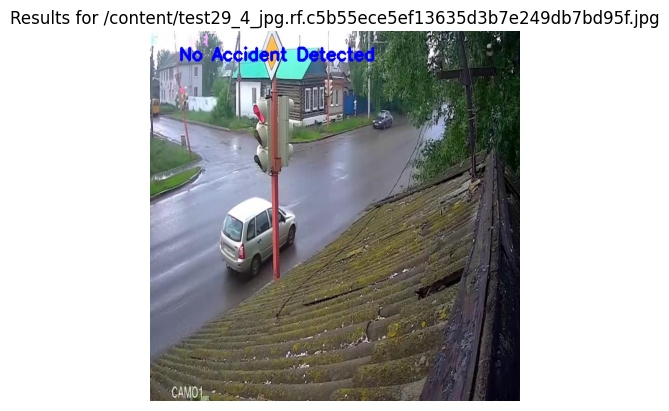


image 1/1 /content/test29_8_jpg.rf.1ec65e202d28855f717f832e0a7d9f14.jpg: 640x640 (no detections), 78.2ms
Speed: 1.4ms preprocess, 78.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


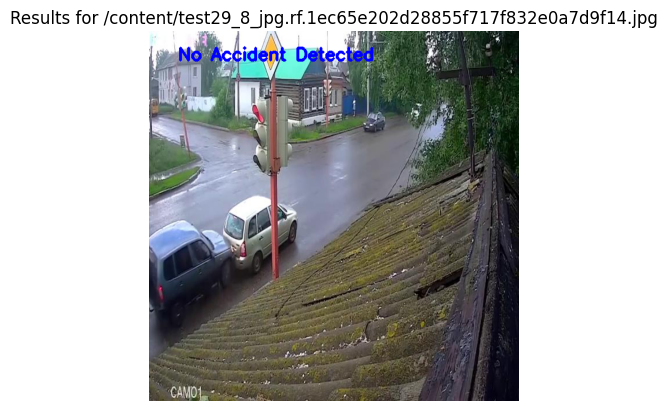


image 1/1 /content/test29_9_jpg.rf.a41a83bc150b725d4f7ad371f3793787.jpg: 640x640 (no detections), 106.6ms
Speed: 2.5ms preprocess, 106.6ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


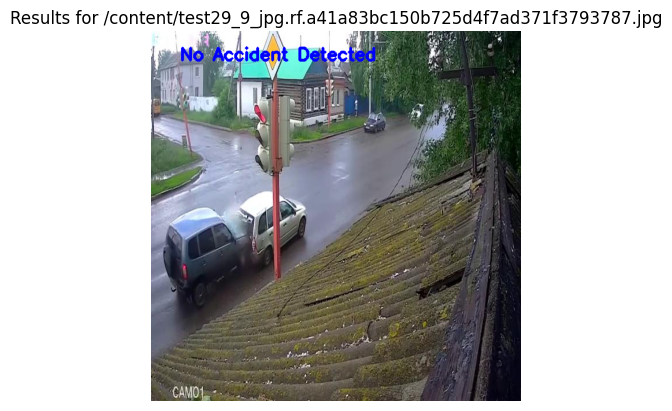


image 1/1 /content/test4_26_jpg.rf.192913b826f45e2f662eed39f4612c4f.jpg: 640x640 1 Accident, 73.9ms
Speed: 2.9ms preprocess, 73.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Label: Accident, Confidence: 0.9748829007148743


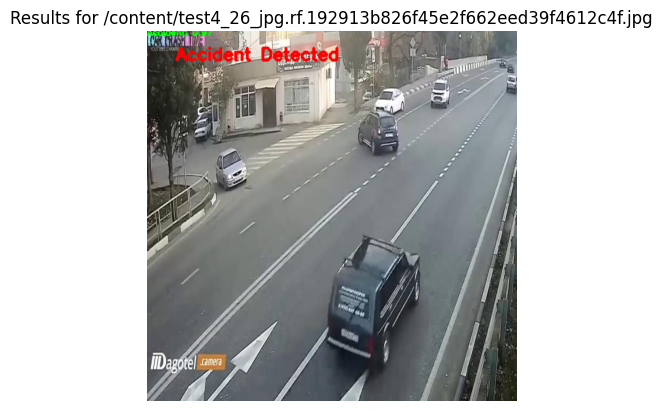


image 1/1 /content/5_10_jpg.rf.3b87f4f05dd4bd4c6fac6764351c3819.jpg: 640x640 (no detections), 68.4ms
Speed: 1.7ms preprocess, 68.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


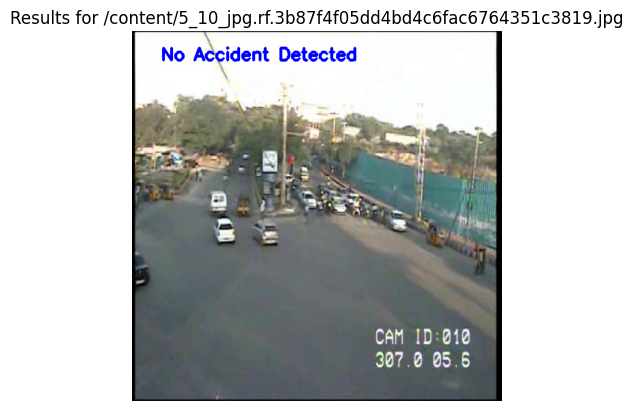


image 1/1 /content/5_27_jpg.rf.0583e849b7f16e62d9d80adbf93fd218.jpg: 640x640 (no detections), 75.6ms
Speed: 2.0ms preprocess, 75.6ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)


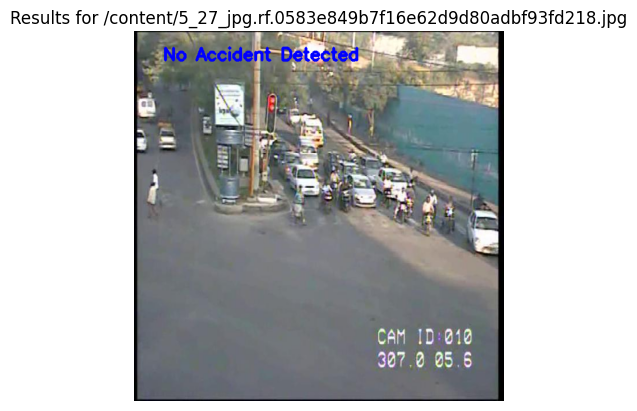


image 1/1 /content/5_30_jpg.rf.b229e059f63ea02cac3f65ae6807cf52.jpg: 640x640 (no detections), 87.8ms
Speed: 1.8ms preprocess, 87.8ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


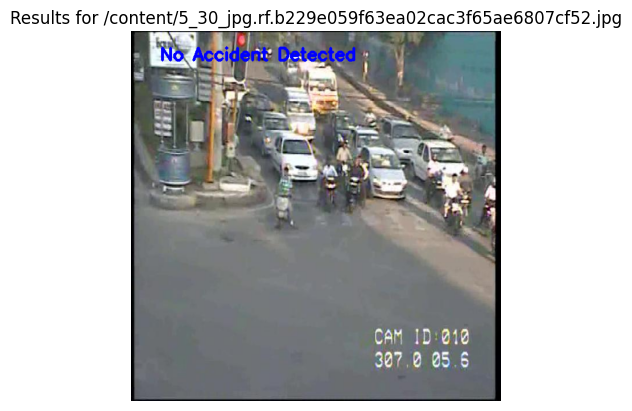

In [ ]:
import matplotlib.pyplot as plt
import cv2
from ultralytics import YOLO


model_predict = YOLO("/content/best.pt")

# list of test image paths to predict on
image_paths = ["/content/test29_4_jpg.rf.c5b55ece5ef13635d3b7e249db7bd95f.jpg", "/content/5_10_jpg.rf.3b87f4f05dd4bd4c6fac6764351c3819.jpg", "/content/5_27_jpg.rf.0583e849b7f16e62d9d80adbf93fd218.jpg","/content/5_30_jpg.rf.b229e059f63ea02cac3f65ae6807cf52.jpg" ]

class_names = ['Accident', 'Non-Accident']

# loop through the images
for image_path in image_paths:

    # do the predict on the each image from list
    results = model_predict(image_path, conf=0.25)


    predictions = results[0]


    image = cv2.imread(image_path)

    # boxes -->  Bounding boxes
    # scores --> confidence scores
    # labels --> class label 0 = 'accident' , class label 1 = 'not accident'

    boxes = predictions.boxes.xyxy.cpu().numpy()
    scores = predictions.boxes.conf.cpu().numpy()
    labels = predictions.boxes.cls.cpu().numpy()

    # flag --> decide if an accident is detected or not
    accident_detected = False

    # loop through predictions
    for i, box in enumerate(boxes):
        label = int(labels[i])
        confidence = scores[i]


        print(f"Label: {class_names[label]}, Confidence: {confidence}")

        # 'accident = 0 and confidence > 0.5
        # 'non accident = 1 and confidence > 0.5
        if label == 0 and confidence > 0.5:
            accident_detected = True  # change the flag
            x1, y1, x2, y2 = map(int, box)
            # draw bounding box
            #cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2) # green

            label_text = f"{class_names[label]}: {confidence:.2f}"
            cv2.putText(image, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


    if accident_detected:
        cv2.putText(image, "Accident Detected", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 3)
    else:
        cv2.putText(image, "No Accident Detected", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 0), 3)


    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(f"Results for {image_path}")
    plt.show()
